In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Multi_Variate_Polynomial_Regression:
    
    
    def __init__(self, X, y, random_seed = 42, degree_of_polynomial = 2):
        
        poly_features = [np.ones((X.shape[0], 1))]
        for i in range(1, degree_of_polynomial + 1):
            poly_features.append(X**i)
            
        poly_features = tuple(poly_features)
        self.X = np.hstack(poly_features)
        self.y = y.reshape(-1, 1)
        
        self._m_records = self.X.shape[0]
        self._n_features = self.X.shape[1]
        
        np.random.seed(random_seed)
        self._weights = np.random.randn(1, self._n_features)
        self._costs = []
        
        self._y_mean = np.mean(self.y, axis = 0)[0]
        
    def mean_absolute_error(self, y_true, y_pred):
        return np.sum(np.abs(y_true - y_pred)) / len(y_true)
    
    def fit(self, learning_rate = 0.0000001, epochs = 60000):
        for epoch in range(1 , epochs+1):
            Hypothesis = np.dot(self._weights, self.X.T)
            error = (Hypothesis - y)
            if epoch % 1000 == 0:
                cost = np.sum(error**2) / 2
                self._costs.append(cost)
                mae = self.mean_absolute_error(y, Hypothesis)
                print('Epoch {}\t: MAE_Error is {}\t| Costs\t:{}'.format(epoch, mae, cost))
                
            updater = learning_rate * error
            self._weights = self._weights - np.dot(updater, self.X)
#             print(self._weights.shape)
        
        self.intercept = self._weights[0][0]
        self.coefficient = self._weights[0][1:]
    
        return self.intercept, self.coefficient
    
    def plot_cost_function(self):
        x_axis = list(range(1, len(self._costs)+1))
        y_axis = self._costs
        
        plt.figure(figsize = (7, 10))
        plt.plot(x_axis, y_axis)
        plt.title('Cost Function Plot')
        plt.xlabel('Epochs in Thousands', fontsize = 20)
        plt.ylabel('Costs', fontsize = 20)
        plt.show()
        
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
#         print(self._weights.shape, self.X.T.shape)
        _y_pred = np.dot(self._weights, self.X.T)
#         print(self.y.shape, _y_pred.shape)
#         print(_y_pred)
#         print(self.y - _y_pred.T)
        line_1_sum = np.sum((self.y - _y_pred.T) ** 2)
        line_2_sum = np.sum((self.y - self._y_mean) ** 2)
#         print(line_1_sum, line_2_sum)
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        print("R2 Score = {}".format(r2_score))
        return r2_score

In [3]:
hw = pd.read_csv('HeightVsWeight.csv')
hw.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


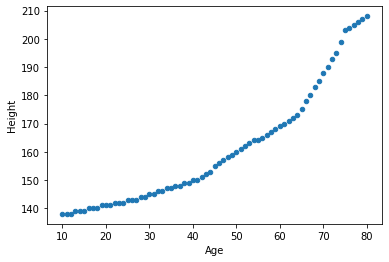

In [4]:
hw.plot('Age', 'Height', 'scatter')

Epoch 1000	: MAE_Error is 37.60300765032292	| Costs	:75806.19938389905
Epoch 2000	: MAE_Error is 35.33727907612734	| Costs	:67283.8896830008
Epoch 3000	: MAE_Error is 33.205549683662554	| Costs	:59739.8199259277
Epoch 4000	: MAE_Error is 31.199894525117465	| Costs	:53061.70208029402
Epoch 5000	: MAE_Error is 29.32170463256326	| Costs	:47150.13718279846
Epoch 6000	: MAE_Error is 27.555097774381164	| Costs	:41917.13585741004
Epoch 7000	: MAE_Error is 25.892971159831266	| Costs	:37284.808657023794
Epoch 8000	: MAE_Error is 24.329145643135433	| Costs	:33184.20673526809
Epoch 9000	: MAE_Error is 22.86504791863758	| Costs	:29554.295592699127
Epoch 10000	: MAE_Error is 21.48972227009776	| Costs	:26341.046622337137
Epoch 11000	: MAE_Error is 20.19573580473133	| Costs	:23496.63293285347
Epoch 12000	: MAE_Error is 18.982903591639083	| Costs	:20978.717479818868
Epoch 13000	: MAE_Error is 17.846670244409644	| Costs	:18749.822909359427
Epoch 14000	: MAE_Error is 16.77763574020056	| Costs	:16776.773

Epoch 117000	: MAE_Error is 5.754857338846769	| Costs	:1560.9073475895282
Epoch 118000	: MAE_Error is 5.754769206526359	| Costs	:1560.9012075700402
Epoch 119000	: MAE_Error is 5.75468628650673	| Costs	:1560.8957723374633
Epoch 120000	: MAE_Error is 5.75460827052323	| Costs	:1560.8909609922816
Epoch 121000	: MAE_Error is 5.75453486854251	| Costs	:1560.8867019210968
Epoch 122000	: MAE_Error is 5.754465807684322	| Costs	:1560.8829317307086
Epoch 123000	: MAE_Error is 5.754400831207017	| Costs	:1560.8795943045552
Epoch 124000	: MAE_Error is 5.754339697553124	| Costs	:1560.8766399674575
Epoch 125000	: MAE_Error is 5.754282179451275	| Costs	:1560.87402474624
Epoch 126000	: MAE_Error is 5.754228063071359	| Costs	:1560.8717097152223
Epoch 127000	: MAE_Error is 5.754177147229545	| Costs	:1560.86966041684
Epoch 128000	: MAE_Error is 5.754129242640371	| Costs	:1560.8678463487654
Epoch 129000	: MAE_Error is 5.754084171213042	| Costs	:1560.866240509905
Epoch 130000	: MAE_Error is 5.754041765389371	

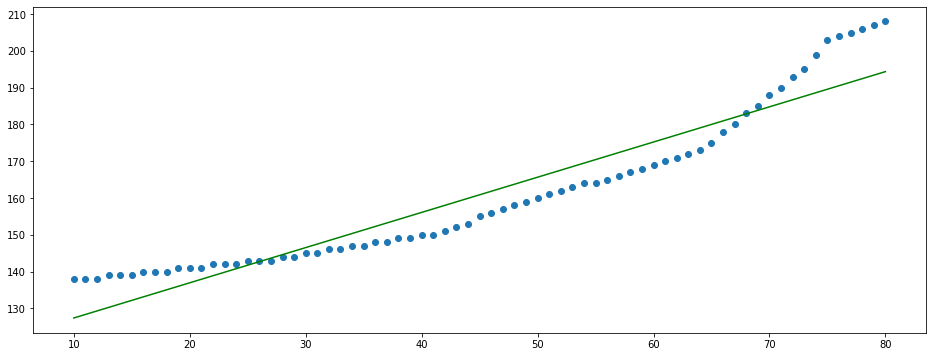

In [16]:
X = hw.iloc[:, [0]].values
y = hw.iloc[:, 1].values

height = Multi_Variate_Polynomial_Regression(X, y, degree_of_polynomial = 1)
height.fit(learning_rate = 0.000005, epochs = 140000)

plt.figure(figsize=(16, 6))
plt.scatter(hw['Age'], hw['Height'])
plot_df = pd.DataFrame({'X' : X[:, 0], 'y' : np.dot(height._weights, height.X.T).T[:, 0]})
plot_df.sort_values(by = 'X', inplace = True, ignore_index = True)
plt.plot(plot_df['X'], plot_df['y'], 'g')

In [70]:
X = hw.iloc[:, [0]].values
y = hw.iloc[:, 1].values

height = Multi_Variate_Polynomial_Regression(X, y, degree_of_polynomial = 2)
height.fit(learning_rate = 0.000000001, epochs = 20000000)

plt.figure(figsize=(16, 6))
plt.scatter(hw['Age'], hw['Height'])
plot_df = pd.DataFrame({'X' : X[:, 0], 'y' : np.dot(height._weights, height.X.T).T[:, 0]})
plot_df.sort_values(by = 'X', inplace = True, ignore_index = True)
plt.plot(plot_df['X'], plot_df['y'], 'g')

Epoch 1000	: MAE_Error is 71.87680555973243	| Costs	:242120.4080247959
Epoch 2000	: MAE_Error is 71.12959403577088	| Costs	:237660.44933848834
Epoch 3000	: MAE_Error is 70.39030585769471	| Costs	:233294.57162274752
Epoch 4000	: MAE_Error is 69.65885700683121	| Costs	:229020.79019872882
Epoch 5000	: MAE_Error is 68.93516435543641	| Costs	:224837.16225524858
Epoch 6000	: MAE_Error is 68.21914565724782	| Costs	:220741.7859655673
Epoch 7000	: MAE_Error is 67.51071953813731	| Costs	:216732.79962280527
Epoch 8000	: MAE_Error is 66.81007320102655	| Costs	:212808.3807935967
Epoch 9000	: MAE_Error is 66.12222008450887	| Costs	:208966.74548959755
Epoch 10000	: MAE_Error is 65.44166086741619	| Costs	:205206.14735647175
Epoch 11000	: MAE_Error is 64.76831820568736	| Costs	:201524.87687998504
Epoch 12000	: MAE_Error is 64.10211557541288	| Costs	:197921.26060884705
Epoch 13000	: MAE_Error is 63.44297726413817	| Costs	:194393.6603939481
Epoch 14000	: MAE_Error is 62.79082836225867	| Costs	:190940.472

Epoch 117000	: MAE_Error is 25.1697251341975	| Costs	:48513.91111918254
Epoch 118000	: MAE_Error is 25.066707194820275	| Costs	:48137.7257403677
Epoch 119000	: MAE_Error is 24.9647811973951	| Costs	:47769.47236609549
Epoch 120000	: MAE_Error is 24.86393556303815	| Costs	:47408.98366731367
Epoch 121000	: MAE_Error is 24.769679576779453	| Costs	:47056.09584484805
Epoch 122000	: MAE_Error is 24.683380439454673	| Costs	:46710.64855493931
Epoch 123000	: MAE_Error is 24.597995924084362	| Costs	:46372.484836349504
Epoch 124000	: MAE_Error is 24.513516332074833	| Costs	:46041.45103900544
Epoch 125000	: MAE_Error is 24.429932067675924	| Costs	:45717.396754149726
Epoch 126000	: MAE_Error is 24.35073242732709	| Costs	:45400.174745962344
Epoch 127000	: MAE_Error is 24.27543498310415	| Costs	:45089.64088462653
Epoch 128000	: MAE_Error is 24.200935479200943	| Costs	:44785.654080806955
Epoch 129000	: MAE_Error is 24.12722545430889	| Costs	:44488.076221509014
Epoch 130000	: MAE_Error is 24.05429653684

Epoch 228000	: MAE_Error is 22.65117271407736	| Costs	:32341.74493406911
Epoch 229000	: MAE_Error is 22.655974584136484	| Costs	:32306.2979552195
Epoch 230000	: MAE_Error is 22.66072484103227	| Costs	:32271.594959097667
Epoch 231000	: MAE_Error is 22.665424032069584	| Costs	:32237.620251087457
Epoch 232000	: MAE_Error is 22.670072698749692	| Costs	:32204.35846765785
Epoch 233000	: MAE_Error is 22.67467137683181	| Costs	:32171.794569377867
Epoch 234000	: MAE_Error is 22.679220596394014	| Costs	:32139.913834080013
Epoch 235000	: MAE_Error is 22.684496108369665	| Costs	:32108.701850167225
Epoch 236000	: MAE_Error is 22.69143018812257	| Costs	:32078.14451006136
Epoch 237000	: MAE_Error is 22.698290036640017	| Costs	:32048.2280037898
Epoch 238000	: MAE_Error is 22.705076441067586	| Costs	:32018.938812707052
Epoch 239000	: MAE_Error is 22.71179018020391	| Costs	:31990.263703349574
Epoch 240000	: MAE_Error is 22.718432024589365	| Costs	:31962.1897214193
Epoch 241000	: MAE_Error is 22.72500273

Epoch 343000	: MAE_Error is 23.249086615605606	| Costs	:30793.28749899998
Epoch 344000	: MAE_Error is 23.25281231610399	| Costs	:30790.070581147193
Epoch 345000	: MAE_Error is 23.256497796086407	| Costs	:30786.91774147144
Epoch 346000	: MAE_Error is 23.26014348205085	| Costs	:30783.82762823803
Epoch 347000	: MAE_Error is 23.26374979597268	| Costs	:30780.798918227767
Epoch 348000	: MAE_Error is 23.2673171553527	| Costs	:30777.830316135278
Epoch 349000	: MAE_Error is 23.270845973264603	| Costs	:30774.920553980282
Epoch 350000	: MAE_Error is 23.2743366584019	| Costs	:30772.068390530956
Epoch 351000	: MAE_Error is 23.277789615124235	| Costs	:30769.27261073995
Epoch 352000	: MAE_Error is 23.281205243503504	| Costs	:30766.53202519178
Epoch 353000	: MAE_Error is 23.284583939369302	| Costs	:30763.845469562188
Epoch 354000	: MAE_Error is 23.28792609435376	| Costs	:30761.211804088944
Epoch 355000	: MAE_Error is 23.291232095936305	| Costs	:30758.62991305349
Epoch 356000	: MAE_Error is 23.29450232

Epoch 458000	: MAE_Error is 23.50080946249295	| Costs	:30641.07331818396
Epoch 459000	: MAE_Error is 23.502087299819763	| Costs	:30640.63239886689
Epoch 460000	: MAE_Error is 23.50335087140529	| Costs	:30640.196999393134
Epoch 461000	: MAE_Error is 23.504600328524614	| Costs	:30639.76700334139
Epoch 462000	: MAE_Error is 23.505835820848855	| Costs	:30639.342296746407
Epoch 463000	: MAE_Error is 23.507057496461883	| Costs	:30638.92276804706
Epoch 464000	: MAE_Error is 23.50826550187731	| Costs	:30638.508308035627
Epoch 465000	: MAE_Error is 23.509459982055297	| Costs	:30638.098809808165
Epoch 466000	: MAE_Error is 23.510641080418644	| Costs	:30637.694168715963
Epoch 467000	: MAE_Error is 23.51180893886942	| Costs	:30637.294282317893
Epoch 468000	: MAE_Error is 23.51296369780498	| Costs	:30636.89905033381
Epoch 469000	: MAE_Error is 23.51410549613382	| Costs	:30636.508374599154
Epoch 470000	: MAE_Error is 23.515234471291542	| Costs	:30636.122159020055
Epoch 471000	: MAE_Error is 23.51635

Epoch 570000	: MAE_Error is 23.581678304642196	| Costs	:30609.73464509057
Epoch 571000	: MAE_Error is 23.582018475941272	| Costs	:30609.531434334756
Epoch 572000	: MAE_Error is 23.582354324687664	| Costs	:30609.328731347672
Epoch 573000	: MAE_Error is 23.582685896719614	| Costs	:30609.126525439926
Epoch 574000	: MAE_Error is 23.58301323738913	| Costs	:30608.92480614764
Epoch 575000	: MAE_Error is 23.583336391567535	| Costs	:30608.72356322767
Epoch 576000	: MAE_Error is 23.583655403650155	| Costs	:30608.522786652986
Epoch 577000	: MAE_Error is 23.58397031756165	| Costs	:30608.322466608057
Epoch 578000	: MAE_Error is 23.584281176760886	| Costs	:30608.122593484422
Epoch 579000	: MAE_Error is 23.58458802424582	| Costs	:30607.92315787629
Epoch 580000	: MAE_Error is 23.58489090255865	| Costs	:30607.724150576352
Epoch 581000	: MAE_Error is 23.585189853790244	| Costs	:30607.525562571464
Epoch 582000	: MAE_Error is 23.585484919585276	| Costs	:30607.327385038625
Epoch 583000	: MAE_Error is 23.58

Epoch 682000	: MAE_Error is 23.600916173676143	| Costs	:30588.637748935773
Epoch 683000	: MAE_Error is 23.60097223639371	| Costs	:30588.456470870802
Epoch 684000	: MAE_Error is 23.601026989464096	| Costs	:30588.275240383868
Epoch 685000	: MAE_Error is 23.601080446776976	| Costs	:30588.094056493508
Epoch 686000	: MAE_Error is 23.601132622074488	| Costs	:30587.912918238948
Epoch 687000	: MAE_Error is 23.601183528953086	| Costs	:30587.731824679708
Epoch 688000	: MAE_Error is 23.601233180865215	| Costs	:30587.55077489515
Epoch 689000	: MAE_Error is 23.601281591120546	| Costs	:30587.36976798403
Epoch 690000	: MAE_Error is 23.601328772887623	| Costs	:30587.188803064124
Epoch 691000	: MAE_Error is 23.601374739195403	| Costs	:30587.007879271827
Epoch 692000	: MAE_Error is 23.60141950293459	| Costs	:30586.82699576173
Epoch 693000	: MAE_Error is 23.601463076859226	| Costs	:30586.646151706307
Epoch 694000	: MAE_Error is 23.60150547358819	| Costs	:30586.465346295445
Epoch 695000	: MAE_Error is 23.

Epoch 798000	: MAE_Error is 23.601358448138107	| Costs	:30567.77661717623
Epoch 799000	: MAE_Error is 23.601326876298526	| Costs	:30567.597480758188
Epoch 800000	: MAE_Error is 23.601294924327224	| Costs	:30567.418349315314
Epoch 801000	: MAE_Error is 23.601262596257236	| Costs	:30567.23922276486
Epoch 802000	: MAE_Error is 23.60122989607877	| Costs	:30567.06010102582
Epoch 803000	: MAE_Error is 23.60119682773984	| Costs	:30566.880984018906
Epoch 804000	: MAE_Error is 23.601163395146322	| Costs	:30566.70187166647
Epoch 805000	: MAE_Error is 23.601129602162974	| Costs	:30566.52276389255
Epoch 806000	: MAE_Error is 23.601095452613464	| Costs	:30566.34366062273
Epoch 807000	: MAE_Error is 23.6010609502808	| Costs	:30566.16456178422
Epoch 808000	: MAE_Error is 23.601026098908008	| Costs	:30565.985467305723
Epoch 809000	: MAE_Error is 23.60099090219844	| Costs	:30565.80637711746
Epoch 810000	: MAE_Error is 23.600955363816094	| Costs	:30565.627291151133
Epoch 811000	: MAE_Error is 23.6009194

Epoch 911000	: MAE_Error is 23.596107496524603	| Costs	:30547.55385104122
Epoch 912000	: MAE_Error is 23.596050833075402	| Costs	:30547.37500276401
Epoch 913000	: MAE_Error is 23.595994055802002	| Costs	:30547.196155891306
Epoch 914000	: MAE_Error is 23.5959371659134	| Costs	:30547.0173104157
Epoch 915000	: MAE_Error is 23.595880164605937	| Costs	:30546.838466329853
Epoch 916000	: MAE_Error is 23.595823053063203	| Costs	:30546.65962362669
Epoch 917000	: MAE_Error is 23.595765832456156	| Costs	:30546.480782299175
Epoch 918000	: MAE_Error is 23.59570850394342	| Costs	:30546.3019423405
Epoch 919000	: MAE_Error is 23.595651068671362	| Costs	:30546.12310374397
Epoch 920000	: MAE_Error is 23.595593527774152	| Costs	:30545.94426650304
Epoch 921000	: MAE_Error is 23.595535882373923	| Costs	:30545.765430611293
Epoch 922000	: MAE_Error is 23.595478133580926	| Costs	:30545.586596062458
Epoch 923000	: MAE_Error is 23.595420282493592	| Costs	:30545.407762850376
Epoch 924000	: MAE_Error is 23.595362

Epoch 1023000	: MAE_Error is 23.58926487938503	| Costs	:30527.53053388653
Epoch 1024000	: MAE_Error is 23.589200743535145	| Costs	:30527.351818568703
Epoch 1025000	: MAE_Error is 23.58913657333332	| Costs	:30527.173104334524
Epoch 1026000	: MAE_Error is 23.589072369145853	| Costs	:30526.994391183296
Epoch 1027000	: MAE_Error is 23.589008131335305	| Costs	:30526.815679114352
Epoch 1028000	: MAE_Error is 23.588943860260247	| Costs	:30526.636968127015
Epoch 1029000	: MAE_Error is 23.588879556275508	| Costs	:30526.458258220653
Epoch 1030000	: MAE_Error is 23.58881521973222	| Costs	:30526.279549394625
Epoch 1031000	: MAE_Error is 23.588750850977704	| Costs	:30526.100841648316
Epoch 1032000	: MAE_Error is 23.588686450355635	| Costs	:30525.922134981138
Epoch 1033000	: MAE_Error is 23.588622018206046	| Costs	:30525.743429392453
Epoch 1034000	: MAE_Error is 23.58855755486534	| Costs	:30525.56472488171
Epoch 1035000	: MAE_Error is 23.588493060666355	| Costs	:30525.386021448325
Epoch 1036000	: MA

Epoch 1135000	: MAE_Error is 23.58193213462813	| Costs	:30507.521057384685
Epoch 1136000	: MAE_Error is 23.58186575002001	| Costs	:30507.34246116442
Epoch 1137000	: MAE_Error is 23.581799355140905	| Costs	:30507.163865997707
Epoch 1138000	: MAE_Error is 23.581732950101873	| Costs	:30506.98527188449
Epoch 1139000	: MAE_Error is 23.58166653501269	| Costs	:30506.806678824672
Epoch 1140000	: MAE_Error is 23.581600109982062	| Costs	:30506.628086818197
Epoch 1141000	: MAE_Error is 23.58153367511752	| Costs	:30506.44949586502
Epoch 1142000	: MAE_Error is 23.58146723052541	| Costs	:30506.270905965048
Epoch 1143000	: MAE_Error is 23.581400776311014	| Costs	:30506.092317118266
Epoch 1144000	: MAE_Error is 23.581334312578452	| Costs	:30505.913729324544
Epoch 1145000	: MAE_Error is 23.581267839430716	| Costs	:30505.73514258388
Epoch 1146000	: MAE_Error is 23.581201356969785	| Costs	:30505.55655689619
Epoch 1147000	: MAE_Error is 23.581134865296544	| Costs	:30505.377972261413
Epoch 1148000	: MAE_Er

Epoch 1248000	: MAE_Error is 23.574385557003975	| Costs	:30487.346340955784
Epoch 1249000	: MAE_Error is 23.574318503484704	| Costs	:30487.167863540097
Epoch 1250000	: MAE_Error is 23.574251447024917	| Costs	:30486.989387174566
Epoch 1251000	: MAE_Error is 23.574184387657805	| Costs	:30486.810911859167
Epoch 1252000	: MAE_Error is 23.574117325416406	| Costs	:30486.63243759389
Epoch 1253000	: MAE_Error is 23.574050260333255	| Costs	:30486.45396437874
Epoch 1254000	: MAE_Error is 23.573983192440572	| Costs	:30486.27549221369
Epoch 1255000	: MAE_Error is 23.57391612177027	| Costs	:30486.097021098707
Epoch 1256000	: MAE_Error is 23.57384904835387	| Costs	:30485.918551033807
Epoch 1257000	: MAE_Error is 23.57378197222263	| Costs	:30485.740082018994
Epoch 1258000	: MAE_Error is 23.573714893407423	| Costs	:30485.561614054248
Epoch 1259000	: MAE_Error is 23.573647811938795	| Costs	:30485.383147139517
Epoch 1260000	: MAE_Error is 23.573580727847013	| Costs	:30485.20468127484
Epoch 1261000	: MAE

Epoch 1359000	: MAE_Error is 23.566930335327605	| Costs	:30467.54175683134
Epoch 1360000	: MAE_Error is 23.56686309845433	| Costs	:30467.363395926237
Epoch 1361000	: MAE_Error is 23.566795860817848	| Costs	:30467.18503607036
Epoch 1362000	: MAE_Error is 23.56672862242835	| Costs	:30467.00667726371
Epoch 1363000	: MAE_Error is 23.56666138329584	| Costs	:30466.82831950624
Epoch 1364000	: MAE_Error is 23.56659414343045	| Costs	:30466.649962797997
Epoch 1365000	: MAE_Error is 23.56652690284196	| Costs	:30466.47160713892
Epoch 1366000	: MAE_Error is 23.56645966154019	| Costs	:30466.293252529078
Epoch 1367000	: MAE_Error is 23.56639241953472	| Costs	:30466.11489896837
Epoch 1368000	: MAE_Error is 23.56632517683516	| Costs	:30465.936546456844
Epoch 1369000	: MAE_Error is 23.566257933450988	| Costs	:30465.7581949945
Epoch 1370000	: MAE_Error is 23.566190689391515	| Costs	:30465.57984458132
Epoch 1371000	: MAE_Error is 23.56612344466603	| Costs	:30465.401495217277
Epoch 1372000	: MAE_Error is 2

Epoch 1470000	: MAE_Error is 23.55946411969099	| Costs	:30447.750100418132
Epoch 1471000	: MAE_Error is 23.55939684190807	| Costs	:30447.571855937163
Epoch 1472000	: MAE_Error is 23.559329564028765	| Costs	:30447.393612504733
Epoch 1473000	: MAE_Error is 23.55926228605612	| Costs	:30447.215370120804
Epoch 1474000	: MAE_Error is 23.559195007993253	| Costs	:30447.037128785352
Epoch 1475000	: MAE_Error is 23.55912772984324	| Costs	:30446.85888849843
Epoch 1476000	: MAE_Error is 23.5590604516091	| Costs	:30446.680649259986
Epoch 1477000	: MAE_Error is 23.558993173293775	| Costs	:30446.502411070007
Epoch 1478000	: MAE_Error is 23.558925894900295	| Costs	:30446.32417392852
Epoch 1479000	: MAE_Error is 23.558858616431525	| Costs	:30446.145937835496
Epoch 1480000	: MAE_Error is 23.5587913378904	| Costs	:30445.96770279093
Epoch 1481000	: MAE_Error is 23.558724059279765	| Costs	:30445.789468794814
Epoch 1482000	: MAE_Error is 23.558656780602476	| Costs	:30445.611235847166
Epoch 1483000	: MAE_Err

Epoch 1580000	: MAE_Error is 23.55206350407112	| Costs	:30428.149492012966
Epoch 1581000	: MAE_Error is 23.5519962288918	| Costs	:30427.97136283135
Epoch 1582000	: MAE_Error is 23.551928953819246	| Costs	:30427.79323469757
Epoch 1583000	: MAE_Error is 23.551861678854447	| Costs	:30427.615107611626
Epoch 1584000	: MAE_Error is 23.55179440399832	| Costs	:30427.436981573497
Epoch 1585000	: MAE_Error is 23.551727129251823	| Costs	:30427.25885658316
Epoch 1586000	: MAE_Error is 23.551659854615913	| Costs	:30427.08073264065
Epoch 1587000	: MAE_Error is 23.55159258009151	| Costs	:30426.902609745954
Epoch 1588000	: MAE_Error is 23.551525305679505	| Costs	:30426.724487899042
Epoch 1589000	: MAE_Error is 23.551458031380832	| Costs	:30426.546367099905
Epoch 1590000	: MAE_Error is 23.551390757196373	| Costs	:30426.368247348575
Epoch 1591000	: MAE_Error is 23.551323483126982	| Costs	:30426.190128644997
Epoch 1592000	: MAE_Error is 23.55125620917362	| Costs	:30426.01201098922
Epoch 1593000	: MAE_Err

Epoch 1691000	: MAE_Error is 23.544596775526387	| Costs	:30408.383548506332
Epoch 1692000	: MAE_Error is 23.54452951634833	| Costs	:30408.20553559654
Epoch 1693000	: MAE_Error is 23.544462257340193	| Costs	:30408.0275237339
Epoch 1694000	: MAE_Error is 23.544394998502277	| Costs	:30407.849512918398
Epoch 1695000	: MAE_Error is 23.544327739834884	| Costs	:30407.671503150028
Epoch 1696000	: MAE_Error is 23.544260481338256	| Costs	:30407.493494428785
Epoch 1697000	: MAE_Error is 23.544193223012744	| Costs	:30407.31548675468
Epoch 1698000	: MAE_Error is 23.544125964858612	| Costs	:30407.13748012769
Epoch 1699000	: MAE_Error is 23.544058706876104	| Costs	:30406.959474547813
Epoch 1700000	: MAE_Error is 23.543991449065537	| Costs	:30406.781470015034
Epoch 1701000	: MAE_Error is 23.543924191427163	| Costs	:30406.603466529356
Epoch 1702000	: MAE_Error is 23.54385693396126	| Costs	:30406.425464090767
Epoch 1703000	: MAE_Error is 23.543789676668105	| Costs	:30406.247462699284
Epoch 1704000	: MAE

Epoch 1807000	: MAE_Error is 23.536795901096166	| Costs	:30387.741033891733
Epoch 1808000	: MAE_Error is 23.536728662995053	| Costs	:30387.563142410134
Epoch 1809000	: MAE_Error is 23.536661425083604	| Costs	:30387.385251974953
Epoch 1810000	: MAE_Error is 23.536594187361914	| Costs	:30387.207362586218
Epoch 1811000	: MAE_Error is 23.536526949830016	| Costs	:30387.029474243864
Epoch 1812000	: MAE_Error is 23.536459712488075	| Costs	:30386.851586947985
Epoch 1813000	: MAE_Error is 23.536392475336097	| Costs	:30386.67370069847
Epoch 1814000	: MAE_Error is 23.536325238374214	| Costs	:30386.49581549537
Epoch 1815000	: MAE_Error is 23.53625800160248	| Costs	:30386.31793133867
Epoch 1816000	: MAE_Error is 23.536190765021004	| Costs	:30386.14004822838
Epoch 1817000	: MAE_Error is 23.53612352862983	| Costs	:30385.962166164445
Epoch 1818000	: MAE_Error is 23.53605629242907	| Costs	:30385.784285146903
Epoch 1819000	: MAE_Error is 23.535989056418753	| Costs	:30385.606405175728
Epoch 1820000	: MAE

Epoch 1917000	: MAE_Error is 23.52940086114324	| Costs	:30368.179242961014
Epoch 1918000	: MAE_Error is 23.52933364426507	| Costs	:30368.001466550304
Epoch 1919000	: MAE_Error is 23.529266427582098	| Costs	:30367.823691185346
Epoch 1920000	: MAE_Error is 23.52919921109432	| Costs	:30367.64591686615
Epoch 1921000	: MAE_Error is 23.52913199480182	| Costs	:30367.468143592683
Epoch 1922000	: MAE_Error is 23.52906477870457	| Costs	:30367.290371364965
Epoch 1923000	: MAE_Error is 23.528997562802616	| Costs	:30367.11260018298
Epoch 1924000	: MAE_Error is 23.528930347095983	| Costs	:30366.934830046714
Epoch 1925000	: MAE_Error is 23.528863131584696	| Costs	:30366.75706095617
Epoch 1926000	: MAE_Error is 23.528795916268777	| Costs	:30366.579292911374
Epoch 1927000	: MAE_Error is 23.528728701148246	| Costs	:30366.401525912243
Epoch 1928000	: MAE_Error is 23.52866148622312	| Costs	:30366.223759958822
Epoch 1929000	: MAE_Error is 23.52859427149346	| Costs	:30366.045995051114
Epoch 1930000	: MAE_Er

Epoch 2029000	: MAE_Error is 23.52187378861571	| Costs	:30348.274783988563
Epoch 2030000	: MAE_Error is 23.52180659371149	| Costs	:30348.09712466444
Epoch 2031000	: MAE_Error is 23.521739399004144	| Costs	:30347.919466385425
Epoch 2032000	: MAE_Error is 23.52167220449369	| Costs	:30347.741809151463
Epoch 2033000	: MAE_Error is 23.521605010180128	| Costs	:30347.564152962575
Epoch 2034000	: MAE_Error is 23.521537816063447	| Costs	:30347.386497818698
Epoch 2035000	: MAE_Error is 23.52147062214368	| Costs	:30347.208843719898
Epoch 2036000	: MAE_Error is 23.521403428420818	| Costs	:30347.031190666123
Epoch 2037000	: MAE_Error is 23.521336234894886	| Costs	:30346.853538657386
Epoch 2038000	: MAE_Error is 23.52126904156587	| Costs	:30346.675887693673
Epoch 2039000	: MAE_Error is 23.521201848433797	| Costs	:30346.49823777497
Epoch 2040000	: MAE_Error is 23.52113465549865	| Costs	:30346.320588901282
Epoch 2041000	: MAE_Error is 23.52106746276045	| Costs	:30346.14294107263
Epoch 2042000	: MAE_Er

Epoch 2140000	: MAE_Error is 23.514416357414767	| Costs	:30328.560977796085
Epoch 2141000	: MAE_Error is 23.514349184394778	| Costs	:30328.383434437103
Epoch 2142000	: MAE_Error is 23.51428201157213	| Costs	:30328.205892122503
Epoch 2143000	: MAE_Error is 23.514214838946828	| Costs	:30328.028350852303
Epoch 2144000	: MAE_Error is 23.514147666518873	| Costs	:30327.85081062648
Epoch 2145000	: MAE_Error is 23.514080494288244	| Costs	:30327.673271444994
Epoch 2146000	: MAE_Error is 23.514013322254975	| Costs	:30327.495733307896
Epoch 2147000	: MAE_Error is 23.513946150419038	| Costs	:30327.318196215154
Epoch 2148000	: MAE_Error is 23.51387897878047	| Costs	:30327.14066016676
Epoch 2149000	: MAE_Error is 23.51381180733924	| Costs	:30326.963125162703
Epoch 2150000	: MAE_Error is 23.513744636095367	| Costs	:30326.785591202995
Epoch 2151000	: MAE_Error is 23.513677465048836	| Costs	:30326.608058287602
Epoch 2152000	: MAE_Error is 23.51361029419968	| Costs	:30326.430526416545
Epoch 2153000	: MA

Epoch 2252000	: MAE_Error is 23.506894206128113	| Costs	:30308.68261209844
Epoch 2253000	: MAE_Error is 23.506827055217144	| Costs	:30308.505185672588
Epoch 2254000	: MAE_Error is 23.506759904503607	| Costs	:30308.327760290445
Epoch 2255000	: MAE_Error is 23.506692753987497	| Costs	:30308.15033595198
Epoch 2256000	: MAE_Error is 23.50662560366884	| Costs	:30307.972912657224
Epoch 2257000	: MAE_Error is 23.50655845354758	| Costs	:30307.795490406123
Epoch 2258000	: MAE_Error is 23.506491303623786	| Costs	:30307.6180691987
Epoch 2259000	: MAE_Error is 23.506424153897434	| Costs	:30307.440649034965
Epoch 2260000	: MAE_Error is 23.506357004368525	| Costs	:30307.26322991489
Epoch 2261000	: MAE_Error is 23.50628985503702	| Costs	:30307.085811838457
Epoch 2262000	: MAE_Error is 23.506222705902974	| Costs	:30306.908394805687
Epoch 2263000	: MAE_Error is 23.506155556966345	| Costs	:30306.730978816526
Epoch 2264000	: MAE_Error is 23.50608840822716	| Costs	:30306.55356387104
Epoch 2265000	: MAE_Er

Epoch 2362000	: MAE_Error is 23.499508789543146	| Costs	:30289.171960904863
Epoch 2363000	: MAE_Error is 23.499441660349717	| Costs	:30288.99464924909
Epoch 2364000	: MAE_Error is 23.499374531353705	| Costs	:30288.817338636338
Epoch 2365000	: MAE_Error is 23.499307402555118	| Costs	:30288.640029066613
Epoch 2366000	: MAE_Error is 23.499240273953934	| Costs	:30288.462720539876
Epoch 2367000	: MAE_Error is 23.499173145550188	| Costs	:30288.28541305617
Epoch 2368000	: MAE_Error is 23.499106017343863	| Costs	:30288.10810661545
Epoch 2369000	: MAE_Error is 23.499038889334948	| Costs	:30287.930801217724
Epoch 2370000	: MAE_Error is 23.498971761523453	| Costs	:30287.753496863
Epoch 2371000	: MAE_Error is 23.49890463390936	| Costs	:30287.576193551224
Epoch 2372000	: MAE_Error is 23.49883750649269	| Costs	:30287.398891282446
Epoch 2373000	: MAE_Error is 23.498770379273452	| Costs	:30287.22159005662
Epoch 2374000	: MAE_Error is 23.498703252251598	| Costs	:30287.044289873764
Epoch 2375000	: MAE_E

Epoch 2475000	: MAE_Error is 23.49192443986416	| Costs	:30269.14234261991
Epoch 2476000	: MAE_Error is 23.49185733297653	| Costs	:30268.965148786992
Epoch 2477000	: MAE_Error is 23.491790226286266	| Costs	:30268.78795599642
Epoch 2478000	: MAE_Error is 23.491723119793377	| Costs	:30268.61076424816
Epoch 2479000	: MAE_Error is 23.491656013497856	| Costs	:30268.433573542217
Epoch 2480000	: MAE_Error is 23.4915889073997	| Costs	:30268.256383878594
Epoch 2481000	: MAE_Error is 23.491521801498916	| Costs	:30268.079195257265
Epoch 2482000	: MAE_Error is 23.491454695795493	| Costs	:30267.902007678233
Epoch 2483000	: MAE_Error is 23.49138759028944	| Costs	:30267.724821141503
Epoch 2484000	: MAE_Error is 23.49132048498075	| Costs	:30267.54763564707
Epoch 2485000	: MAE_Error is 23.49125337986944	| Costs	:30267.37045119493
Epoch 2486000	: MAE_Error is 23.491186274955478	| Costs	:30267.193267785035
Epoch 2487000	: MAE_Error is 23.491119170238875	| Costs	:30267.01608541741
Epoch 2488000	: MAE_Error

Epoch 2587000	: MAE_Error is 23.484409695178794	| Costs	:30249.303111063346
Epoch 2588000	: MAE_Error is 23.484342610393256	| Costs	:30249.126033933357
Epoch 2589000	: MAE_Error is 23.484275525805018	| Costs	:30248.948957844997
Epoch 2590000	: MAE_Error is 23.484208441414093	| Costs	:30248.771882798297
Epoch 2591000	: MAE_Error is 23.48414135722049	| Costs	:30248.594808793223
Epoch 2592000	: MAE_Error is 23.484074273224167	| Costs	:30248.417735829767
Epoch 2593000	: MAE_Error is 23.484007189425174	| Costs	:30248.240663907945
Epoch 2594000	: MAE_Error is 23.483940105823482	| Costs	:30248.063593027724
Epoch 2595000	: MAE_Error is 23.48387302241907	| Costs	:30247.886523189096
Epoch 2596000	: MAE_Error is 23.48380593921201	| Costs	:30247.709454392112
Epoch 2597000	: MAE_Error is 23.483738856202212	| Costs	:30247.53238663668
Epoch 2598000	: MAE_Error is 23.48367177338975	| Costs	:30247.355319922874
Epoch 2599000	: MAE_Error is 23.483604690774587	| Costs	:30247.178254250626
Epoch 2600000	: M

KeyboardInterrupt: 

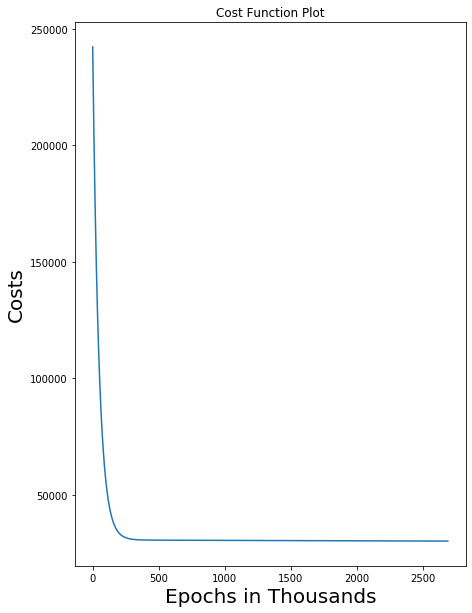

In [71]:
height.plot_cost_function()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [43]:
X = hw.iloc[:, [0]].values
y = hw.iloc[:, 1].values

In [44]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

In [45]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

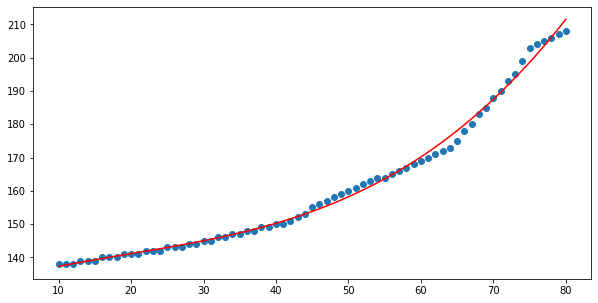

In [46]:
plt.figure(figsize = (10, 5))

plt.scatter(hw['Age'], hw['Height'])
plt.plot(X, model.predict(x_poly), color = 'r')